In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

## Data Cleanup

In [2]:
os.chdir(r'F:\Projects\NBA\DB_Files')
df = pd.read_csv('games_export.csv', sep=';')

In [3]:
df.columns

Index(['Name', 'FTM', '3P%', '3PA', 'TOV', 'PF', 'REB', '3PM', 'FG%', 'FGA',
       'OREB', 'FT%', 'FTA', 'FGM', 'DREB', 'PTS', 'MIN', '+/-', 'AST', 'STL',
       'BLK', 'Date', 'Game', '1QH', '2QH', '3QH', '4QH', '1QA', '2QA', '3QA',
       '4QA', 'Total_H', 'Total_A', 'Ref1', 'Ref2', 'Ref3', 'W/L', 'Home',
       'Away', 'Fantasy_Score'],
      dtype='object')

In [4]:
df.dtypes

Name              object
FTM                int64
3P%              float64
3PA                int64
TOV                int64
PF                 int64
REB                int64
3PM                int64
FG%              float64
FGA                int64
OREB               int64
FT%              float64
FTA                int64
FGM                int64
DREB               int64
PTS                int64
MIN               object
+/-                int64
AST                int64
STL                int64
BLK                int64
Date              object
Game               int64
1QH                int64
2QH                int64
3QH                int64
4QH                int64
1QA                int64
2QA                int64
3QA                int64
4QA                int64
Total_H            int64
Total_A            int64
Ref1              object
Ref2              object
Ref3              object
W/L               object
Home              object
Away              object
Fantasy_Score    float64


In [5]:
def game_number_fix(row):
   if row['Game'] > 800:
      return row['Game'] - 99
   else:
      return row['Game']   

In [6]:
df['game_number'] = df.apply(lambda row: game_number_fix(row),axis=1)

In [7]:
df.drop(columns=['Game','MIN','Date'], axis=1, inplace=True)

In [8]:
df_dummies = pd.get_dummies(df)

In [9]:
df_dummies.drop(columns=['game_number','FTM', '3P%', '3PA', 'TOV', 'PF', 'REB', '3PM', 'FG%', 'FGA',
       'OREB', 'FT%', 'FTA', 'FGM', 'DREB','+/-', 'AST', 'STL',
       'BLK', '1QH', '2QH', '3QH', '4QH', '1QA', '2QA', '3QA',
       '4QA', 'Total_H', 'Total_A', 'Fantasy_Score'], axis=1,inplace=True)

In [10]:
df_dummies.columns

Index(['PTS', 'Name_Aaron Brooks', 'Name_Aaron Gordon', 'Name_Aaron Harrison',
       'Name_Aaron Jackson', 'Name_Abdel Nader', 'Name_Adreian Payne',
       'Name_Al Horford', 'Name_Al Jefferson', 'Name_AlFarouq Aminu',
       ...
       'Away_OKC', 'Away_ORL', 'Away_PHI', 'Away_PHX', 'Away_POR', 'Away_SAC',
       'Away_SAS', 'Away_TOR', 'Away_UTA', 'Away_WAS'],
      dtype='object', length=782)

## Machine Learning Part

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_dummies.drop(columns=['PTS'])
y = df['PTS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn import linear_model

In [15]:
lm = linear_model.LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(lm.intercept_)

36060132421722.016


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Name_Aaron Brooks,1.563290e+12
Name_Aaron Gordon,1.563290e+12
Name_Aaron Harrison,1.563290e+12
Name_Aaron Jackson,1.563290e+12
Name_Abdel Nader,1.563290e+12
Name_Adreian Payne,1.563290e+12
Name_Al Horford,1.563290e+12
Name_Al Jefferson,1.563290e+12
Name_AlFarouq Aminu,1.563290e+12
Name_Alan Williams,1.563290e+12


In [18]:
predictions = lm.predict(X_test)

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 147741004277.56567
MSE: 3.2789080392958684e+25
RMSE: 5726175022906.537


In [113]:
aaron = df_dummies[df_dummies['Name_Aaron Brooks'] == 1]

In [114]:
aaron = aaron.loc[:, (aaron != 0).any(axis=0)]

In [115]:
aaron

,PTS,Name_Aaron Brooks,"Ref1_Adams""""","Ref1_Ayotte""""","Ref1_Brothers""""","Ref1_Callahan""""","Ref1_Capers""""","Ref1_DeRosa""""","Ref1_Fitzgerald""""","Ref1_Foster""""",...,Away_DET,Away_GSW,Away_IND,Away_LAC,Away_MIL,Away_MIN,Away_NOP,Away_PHI,Away_POR,Away_SAC
1132,5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1207,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2904,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3108,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3514,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4805,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5863,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6219,5,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6477,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
#This will tell what the particular row is using for input data
first = X_test.iloc[0]
first = first.where(first >= 1)
first.dropna()

Name_Stephen Curry    1.0
Ref1_Garretson""      1.0
Ref2_Ayotte""         1.0
Ref3_Orr              1.0
W/L_UTAH              1.0
Home_GSW              1.0
Away_UTA              1.0
Name: 15955, dtype: float64

In [117]:
y_test[0:5]

15955    14
8300      2
5658      3
5617      4
20187    20
Name: PTS, dtype: int64

In [154]:
predictions[0]

28.09375

## The problem prediction

In [137]:
predictions[3412]

71521587036368.31

In [141]:
y_test[3412:3413]

22284    3
Name: PTS, dtype: int64

In [122]:
#This will tell what the particular row is using for input data
problem = X_test.iloc[3412]
problem = problem.where(problem >= 1)
problem.dropna()

Name_Anthony Brown    1.0
Ref1_Garretson""      1.0
Ref2_Wall""           1.0
Ref3_Washington       1.0
W/L_UTAH              1.0
Home_UTA              1.0
Away_MIN              1.0
Name: 22284, dtype: float64

In [142]:
problem = X_test.iloc[3412:3413]
predict2 = lm.predict(problem)
predict2

array([7.1521587e+13])

## Yellowbrick Analytics

In [143]:
from yellowbrick.regressor import PredictionError

In [144]:
visualizer = PredictionError(lm)

-5.1389834033485345e+23

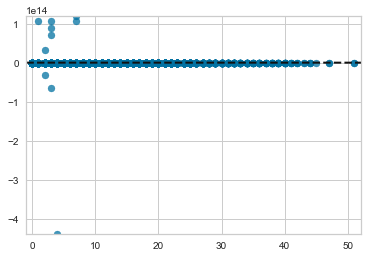

In [145]:
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

(7909, 781)

-437425153427915.5

772